In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from drop_activation import drop_activation

In [3]:
log_dir = 'logs/'
if tf.gfile.IsDirectory(log_dir):
    tf.gfile.DeleteRecursively(log_dir)
tf.gfile.MakeDirs(log_dir)

In [4]:
sess = tf.InteractiveSession()

In [5]:
input_tf = tf.placeholder(shape=[50, 50], dtype=tf.float32, name='input')
is_training = tf.placeholder(shape=[], dtype=tf.bool, name='is_training')

In [6]:
output_tf = drop_activation(inputs=input_tf, p=0.95, training=is_training)

In [7]:
writer = tf.summary.FileWriter(log_dir, graph=sess.graph)
writer.close()

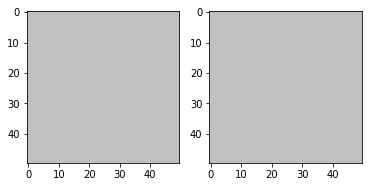

In [10]:
input_np = np.ones(shape=[50, 50], dtype=np.float32)
feed_dict = {input_tf: input_np,
             is_training: True}
output_np = sess.run(output_tf, feed_dict=feed_dict)


plt.subplot(121)
plt.imshow(input_np, cmap='gray', vmin=-2, vmax=2)
plt.subplot(122)
plt.imshow(output_np, cmap='gray', vmin=-2, vmax=2)

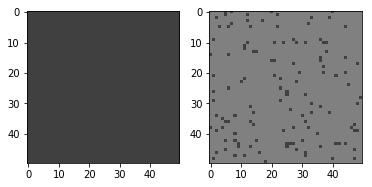

In [11]:
input_np = - np.ones(shape=[50, 50], dtype=np.float32)
feed_dict = {input_tf: input_np,
             is_training: True}
output_np = sess.run(output_tf, feed_dict=feed_dict)


plt.subplot(121)
plt.imshow(input_np, cmap='gray', vmin=-2, vmax=2)
plt.subplot(122)
plt.imshow(output_np, cmap='gray', vmin=-2, vmax=2)
# in TRAINING mode ~95% pixel follow the relu (pixels set to 0)
# only ~5% of pixels follow identity mapping

-0.050000004


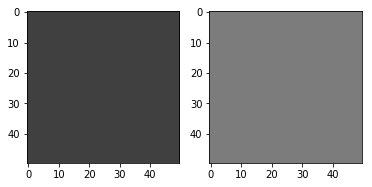

In [13]:
input_np = - np.ones(shape=[50, 50], dtype=np.float32)
feed_dict = {input_tf: input_np,
             is_training: False}
output_np = sess.run(output_tf, feed_dict=feed_dict)


plt.subplot(121)
plt.imshow(input_np, cmap='gray', vmin=-2, vmax=2)
plt.subplot(122)
plt.imshow(output_np, cmap='gray', vmin=-2, vmax=2)
# in TESTING mode 100% of pixel follow a Leaky ReLU activation with slope 1 - p 

print(output_np.mean())